In [1]:
import sys
sys.path.append("..")

In [13]:
from math import nan
from pathlib import Path
from wandb_utils import Metrics, load_data, plot

In [3]:
results_dir = Path("../../results/cmnist/2v4/mildly_subs_miss_s-0.5cont-more_data/")

data = load_data(
#     results_dir / "ranking-fdm.kvq_3discs.batching.mildly_subs_miss_s.csv",
    results_dir / "ranking-fdm.kvq_3discs.mildly_subs_miss_s.csv",
#     results_dir / "kmeans-fdm.kvq_3discs.batching.mildly_subs_miss_s.csv",
    results_dir / "kmeans-fdm.kvq_3discs.mildly_subs_miss_s.csv",
#     results_dir / "no-cluster-fdm.kvq_3discs.batching.mildly_subs_miss_s.csv",
    results_dir / "no-cluster-fdm.kvq_3discs.mildly_subs_miss_s.csv",
#     results_dir / "perfect-cluster.kvq_3discs.batching.mildly_subs_miss_s.csv",
    results_dir / "perfect-cluster.tue-sweep.3-discs.mildly_subs_miss_s.csv",

    results_dir / "cmnist_baseline_cnn_color_60epochs.csv",
#     results_dir / "cmnist_baseline_dro_color_eta_0.01_60epochs.csv",
    results_dir / "cmnist_baseline_dro_color_eta_0.1_60epochs.csv",
#     results_dir / "cmnist_baseline_dro_color_eta_0.3_60epochs.csv",
#     results_dir / "cmnist_baseline_dro_color_eta_1.0_60epochs.csv",
    results_dir / "cmnist_baseline_lff_color_60epochs.csv",

)

In [4]:
plot_kwargs = dict(
    file_format="pdf",
    fig_dim=(5, 2),
    file_prefix="cmnist_2v4_miss_s",
)

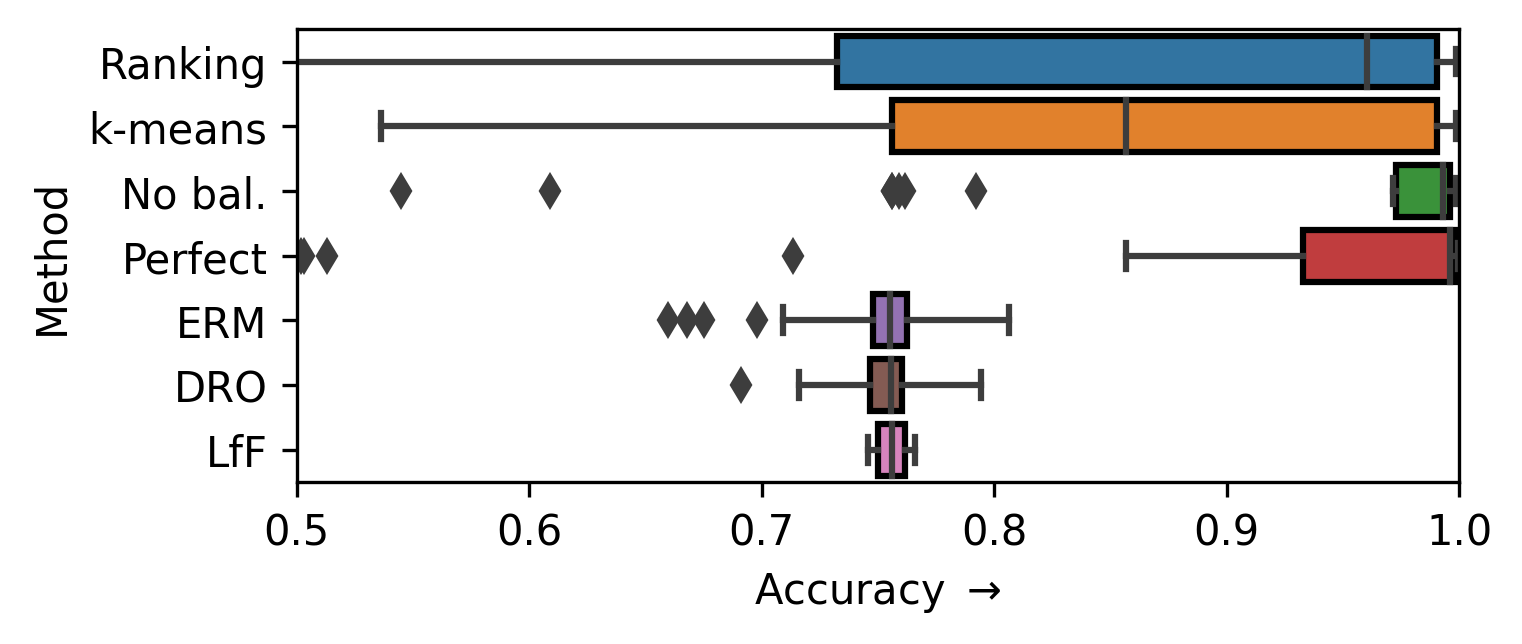

In [5]:
plot(data, metrics=[Metrics.acc], x_limits=(0.5, 1), **plot_kwargs)

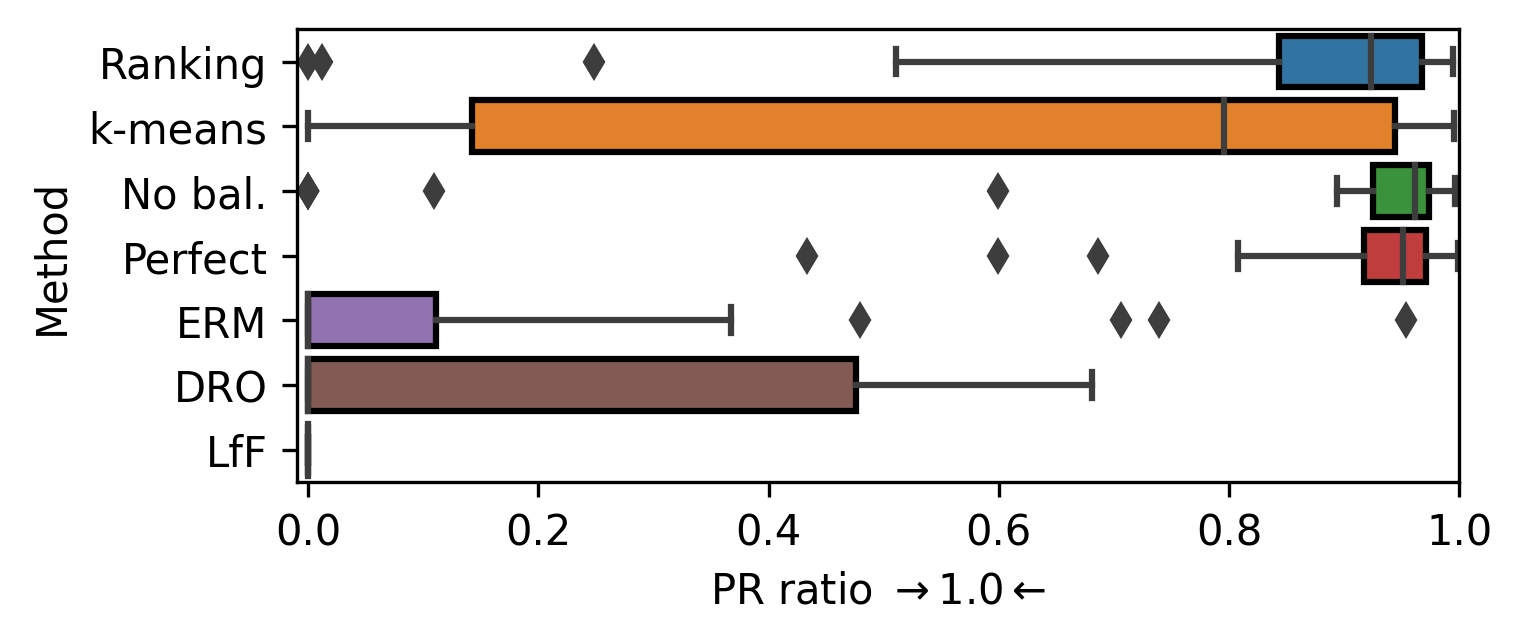

In [6]:
plot(data, metrics=[Metrics.pr], x_limits=(-0.01, 1), **plot_kwargs)

In [7]:
# plot -m tpr -x nan 1 "$@"

In [8]:
# plot -m tnr -x nan 1 "$@"

In [9]:
results_dir = Path("../../results/cmnist/2v4/mildly_subs_miss_s-0.5cont-more_data/")

data_alt = load_data(
    results_dir / "ranking-fdm.kvq_3discs.batching.mildly_subs_miss_s.csv",
#     results_dir / "ranking-fdm.kvq_3discs.mildly_subs_miss_s.csv",
    results_dir / "kmeans-fdm.kvq_3discs.batching.mildly_subs_miss_s.csv",
#     results_dir / "kmeans-fdm.kvq_3discs.mildly_subs_miss_s.csv",
    results_dir / "no-cluster-fdm.kvq_3discs.batching.mildly_subs_miss_s.csv",
#     results_dir / "no-cluster-fdm.kvq_3discs.mildly_subs_miss_s.csv",
    results_dir / "perfect-cluster.kvq_3discs.batching.mildly_subs_miss_s.csv",
#     results_dir / "perfect-cluster.tue-sweep.3-discs.mildly_subs_miss_s.csv",

    results_dir / "cmnist_baseline_cnn_color_60epochs.csv",
#     results_dir / "cmnist_baseline_dro_color_eta_0.01_60epochs.csv",
    results_dir / "cmnist_baseline_dro_color_eta_0.1_60epochs.csv",
#     results_dir / "cmnist_baseline_dro_color_eta_0.3_60epochs.csv",
#     results_dir / "cmnist_baseline_dro_color_eta_1.0_60epochs.csv",
    results_dir / "cmnist_baseline_lff_color_60epochs.csv",

)

In [10]:
plot_kwargs_alt = dict(
    file_format="pdf",
    fig_dim=(5, 2),
    file_prefix="cmnist_2v4_miss_s_alt",
)

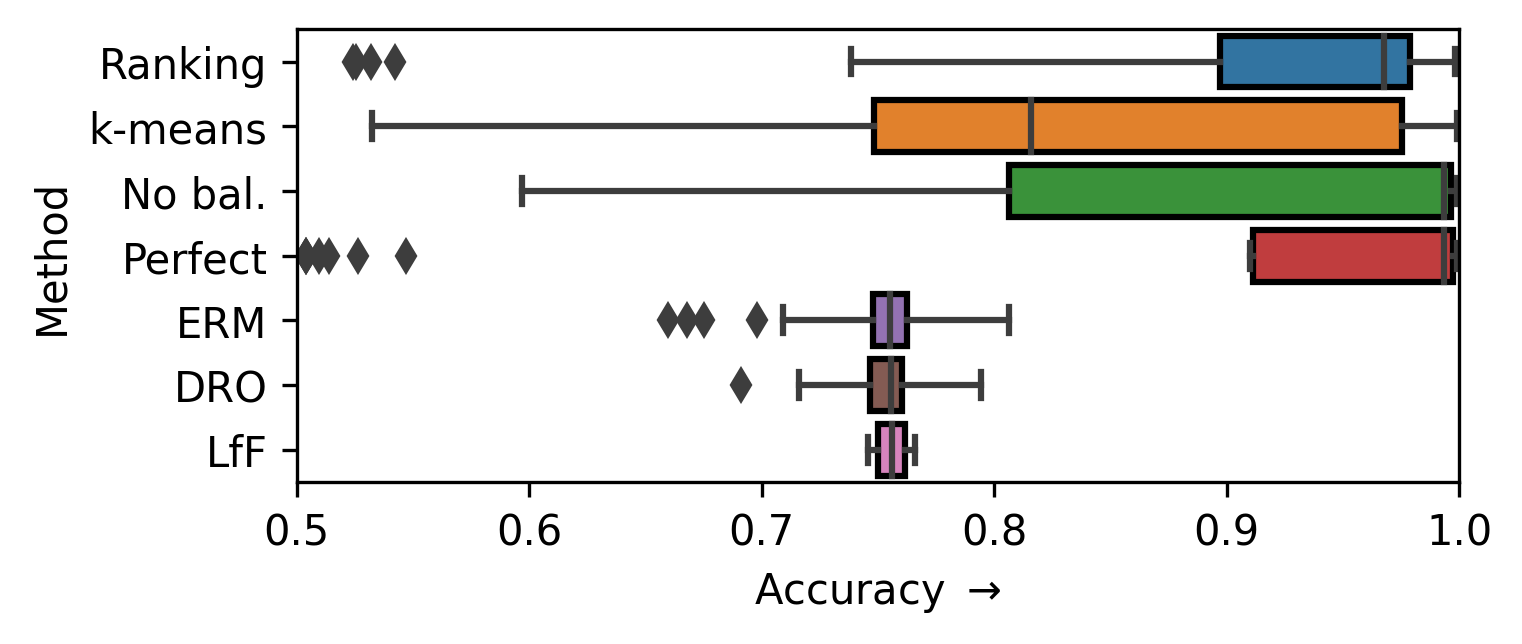

In [11]:
plot(data_alt, metrics=[Metrics.acc], x_limits=(0.5, 1), **plot_kwargs_alt)

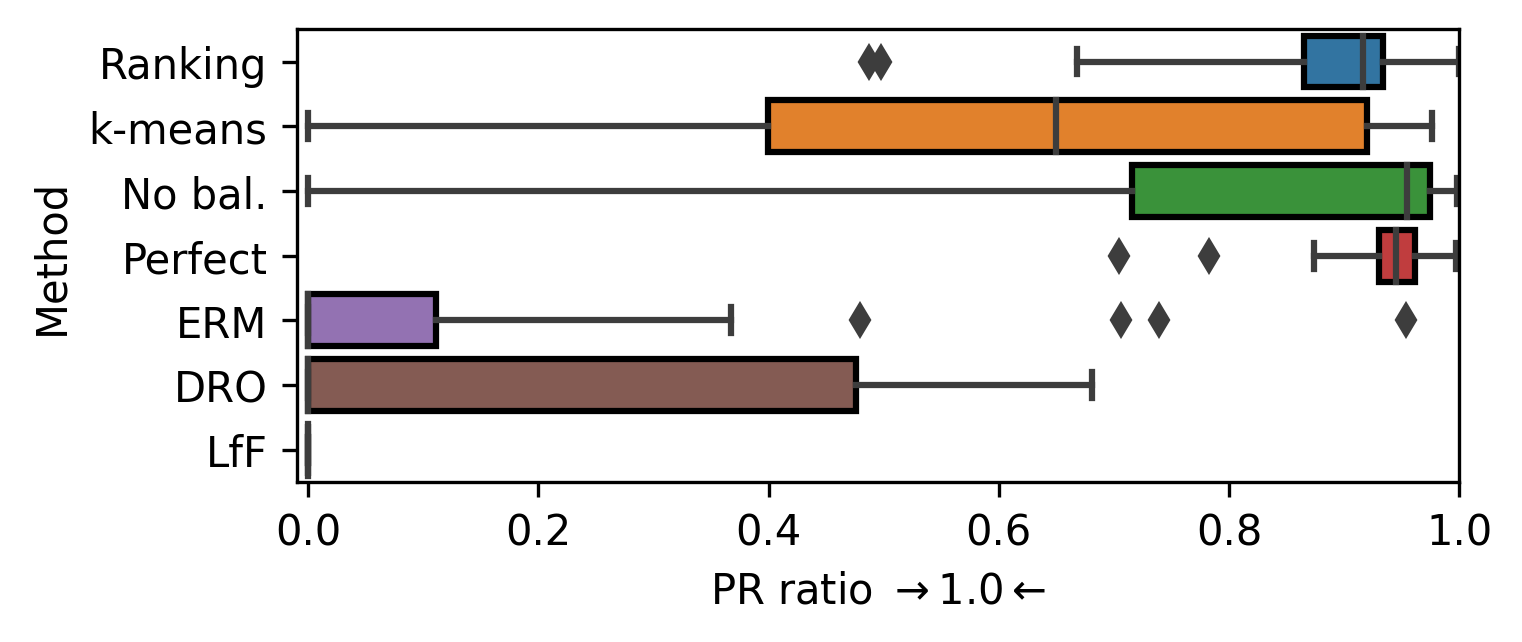

In [12]:
plot(data_alt, metrics=[Metrics.pr], x_limits=(-0.01, 1), **plot_kwargs_alt)

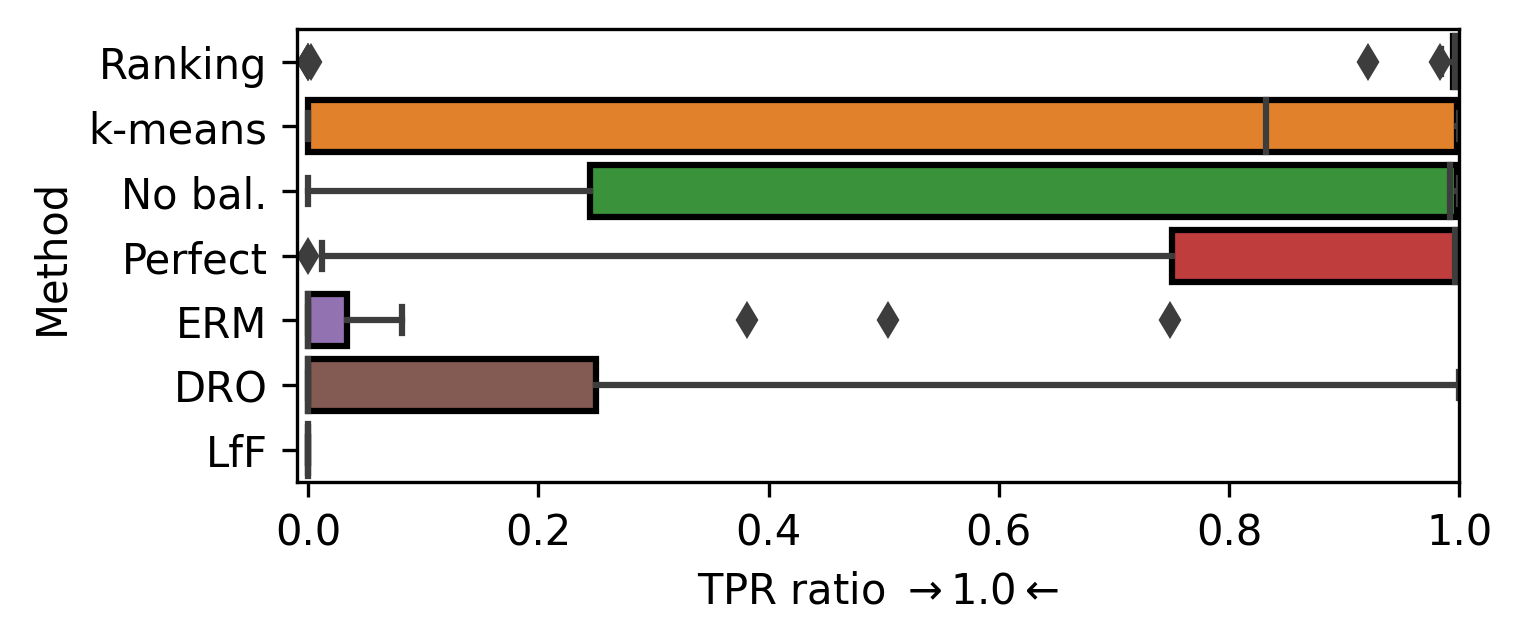

In [14]:
plot(data_alt, metrics=[Metrics.tpr], x_limits=(-0.01, 1), **plot_kwargs_alt)

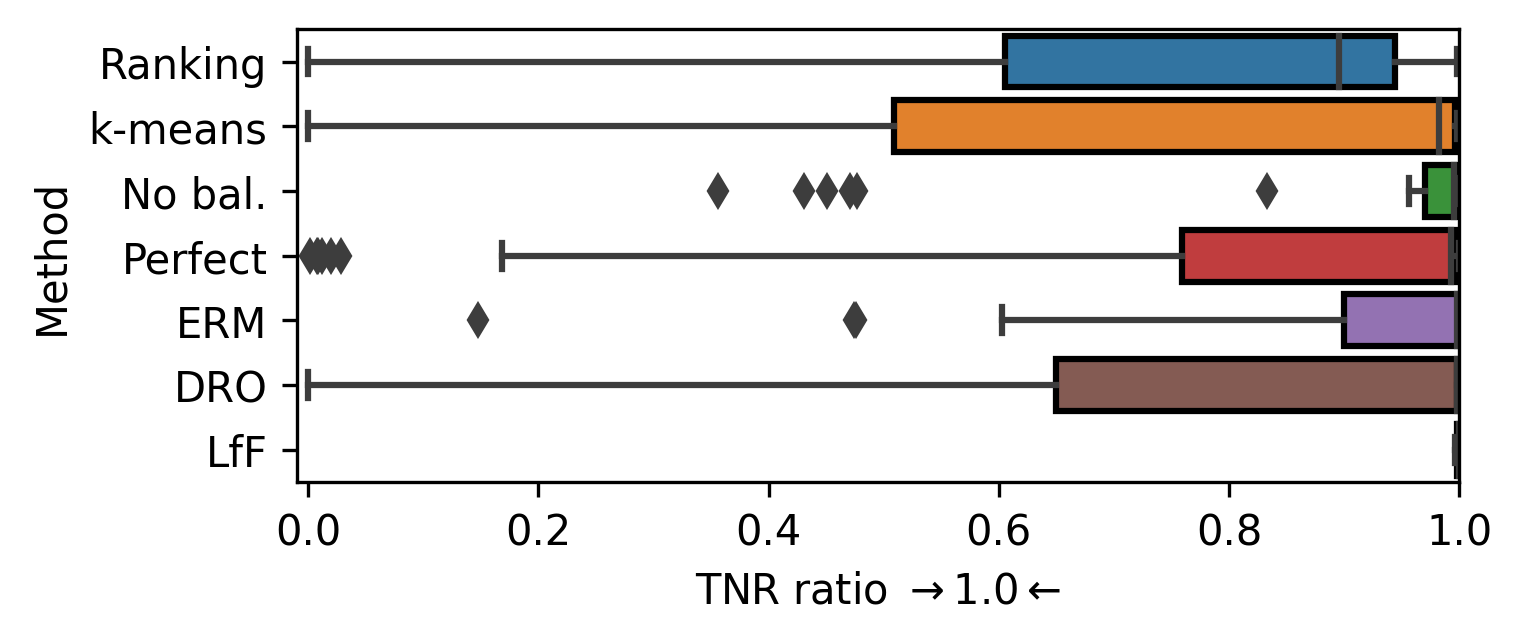

In [15]:
plot(data_alt, metrics=[Metrics.tnr], x_limits=(-0.01, 1), **plot_kwargs_alt)